<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf


# Define start day to fetch the dataset from the yahoo finance library

---



In [5]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [6]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.037445,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.112854,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,277.688904,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,269.961121,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,264.444031,6048178


In [7]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178


Visualizing Closing Price

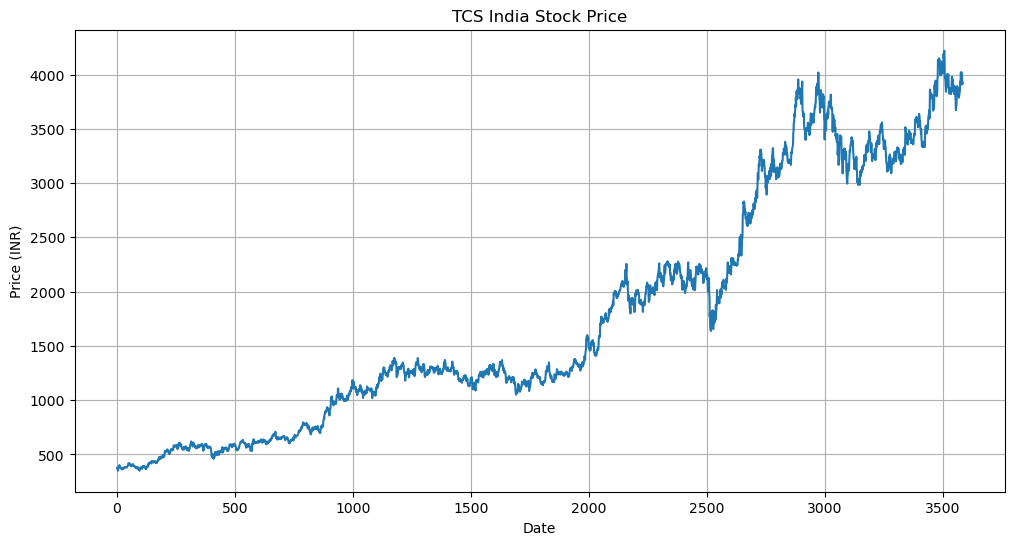

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [9]:
df

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178
...,...,...,...,...,...
3578,4010.000000,4026.750000,3988.000000,4011.800049,1668616
3579,4022.000000,4031.250000,3978.050049,3993.199951,1758882
3580,3985.000000,4006.949951,3975.100098,3985.500000,1305801
3581,3983.699951,4003.300049,3902.000000,3909.149902,2669716


# Plotting moving averages of 100 day

---



In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3578    3943.340000
3579    3942.438000
3580    3940.952000
3581    3938.706497
3582    3936.736494
Name: Close, Length: 3583, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

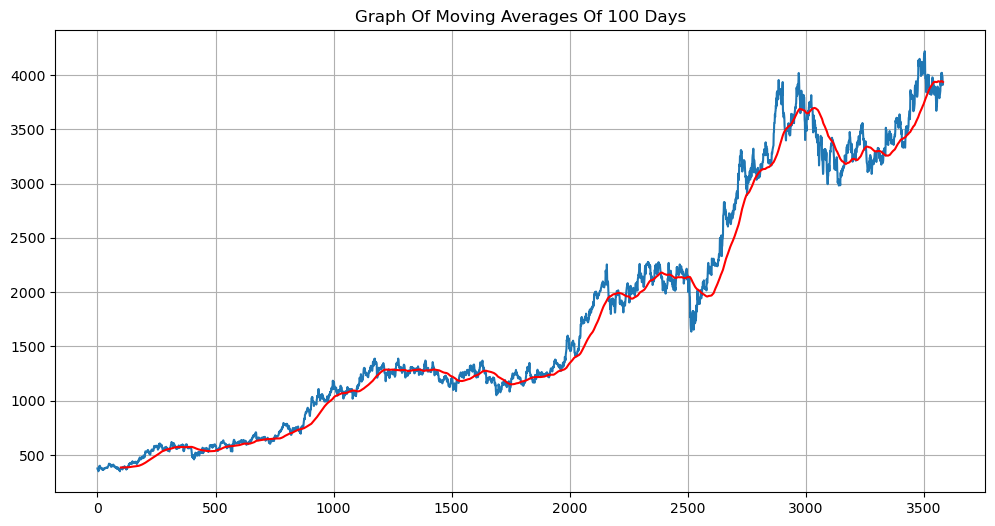

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3578    3780.875752
3579    3783.632252
3580    3786.156503
3581    3787.798252
3582    3789.577501
Name: Close, Length: 3583, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

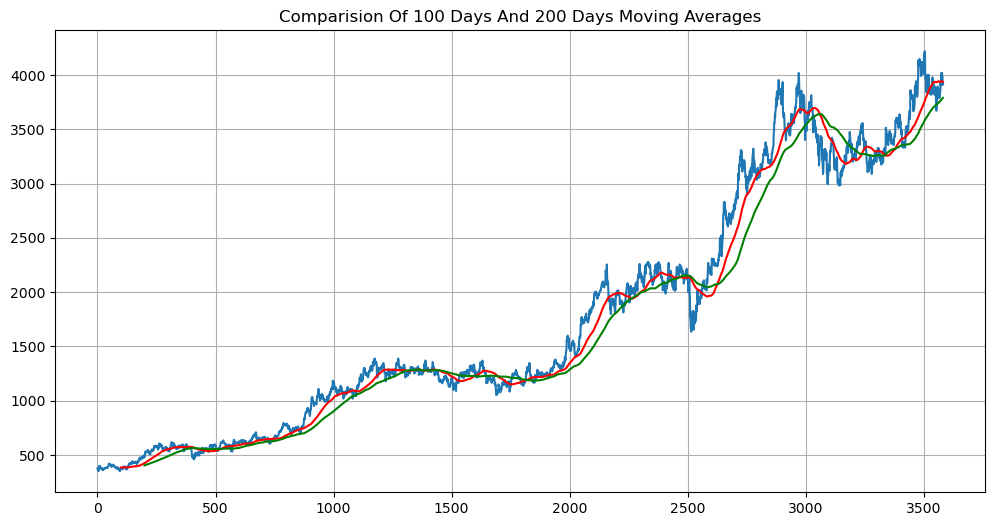

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [14]:
df.shape

(3583, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [15]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2508, 7)
(1075, 7)


In [16]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.037445,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.112854,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,277.688904,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,269.961121,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,264.444031,6048178


In [17]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2508,2020-03-06,2098.000000,2123.649902,2071.600098,2116.449951,1942.454346,2595027
2509,2020-03-09,2075.000000,2079.899902,1935.000000,1972.349976,1810.200928,4940975
2510,2020-03-11,1933.000000,1987.300049,1920.000000,1953.699951,1793.084473,6796449
2511,2020-03-12,1904.000000,1908.400024,1758.349976,1769.849976,1624.348511,8728786
2512,2020-03-13,1687.900024,1820.000000,1506.050049,1806.300049,1657.802490,8029720


# Using MinMax scaler for normalization of the dataset

---



In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [20]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01351019],
       [0.01356204],
       [0.00915373],
       ...,
       [0.87462237],
       [0.89899775],
       [0.92070227]])

In [21]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [22]:
x_train.shape

(2408, 100, 1)

# ML Model (LSTM)

---



In [23]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [26]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - loss: 0.0987 - mean_absolute_error: 0.2281
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - loss: 0.0090 - mean_absolute_error: 0.0663
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - loss: 0.0080 - mean_absolute_error: 0.0617
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - loss: 0.0073 - mean_absolute_error: 0.0589
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0069 - mean_absolute_error: 0.0579
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0054 - mean_absolute_error: 0.0516
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - loss: 0.0060 - mean_absolute_error: 0.0536
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - loss: 0.0056 - mean_absolute_error: 0.0516
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0053 - mean_absolute_error: 0.0516
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0048 - mean_absolute_error: 0.0486
Epoch 11/

In [27]:
from tensorflow.keras.models import load_model

# Load your model (assuming you have a way to do this within your notebook)
# model = ... (your code to define/load the model)

# Save the model to H5 format
model.save('model.h5')


In [28]:
test_close.shape

(1075, 1)

In [29]:
past_100_days = pd.DataFrame(train_close[-100:])

In [30]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [31]:
final_df = past_100_days.append(test_df, ignore_index = True)

/var/folders/ty/6bg13t2n4cx878qbsy_lg84r0000gn/T/ipykernel_70512/1505569079.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [32]:
final_df.head()

,0
0,2021.000000
1,2037.300049
2,2046.400024
3,2030.949951
4,2057.350098


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.14892176],
       [0.15523252],
       [0.15875568],
       ...,
       [0.90950095],
       [0.87994111],
       [0.88557434]])

In [34]:
input_data.shape

(1175, 1)

# Testing the model

---



In [35]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1075, 100, 1)
(1075,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [37]:
# Making predictions

y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step


In [38]:
y_pred.shape

(1075, 1)

In [39]:
y_test

array([0.18587633, 0.13008634, 0.12286576, ..., 0.90950095, 0.87994111,
       0.88557434])

In [40]:
y_pred

array([[0.23868722],
       [0.23451124],
       [0.23089728],
       ...,
       [0.8357744 ],
       [0.8360169 ],
       [0.8329443 ]], dtype=float32)

In [41]:
scaler.scale_

array([0.00038716])

In [42]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

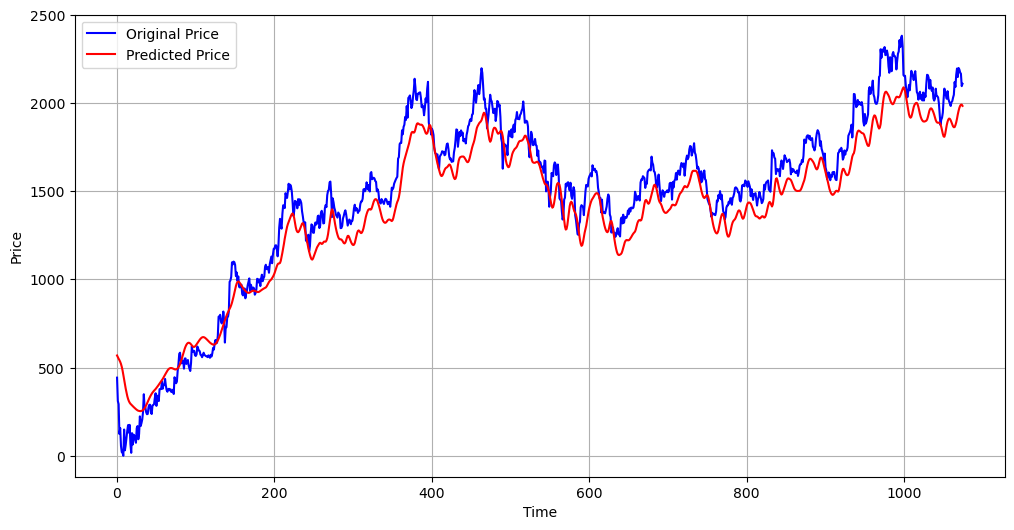

In [43]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [44]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 8.56%


Calculation of R2 score

In [45]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9171808406484481


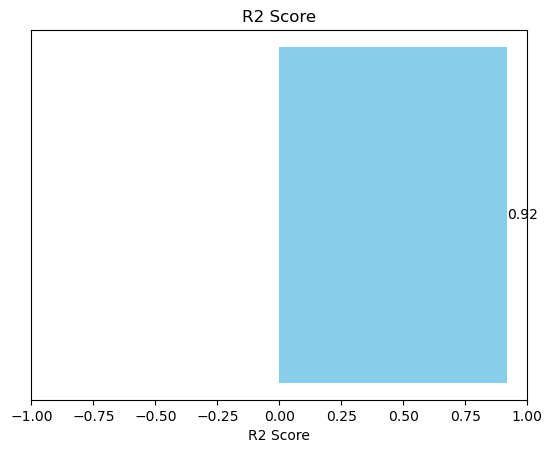

In [46]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

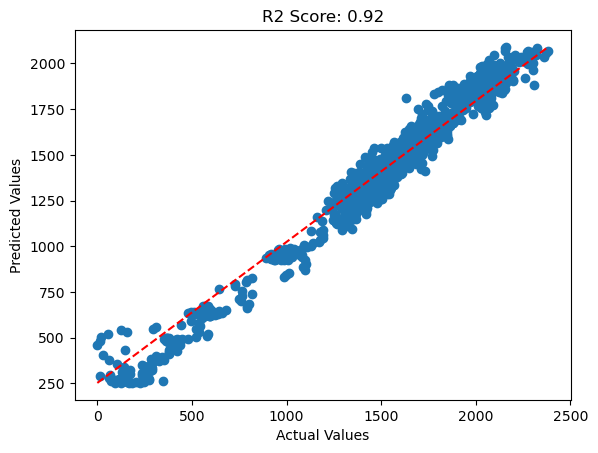

In [47]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()